# Project: NON-SHOW  APPOINTMENTS DATASET ANALYSIS

# Introduction:
    the dataset that I have choosed is No-show appointments
    I choosed this because I would like to help doctors in finding the reasons of not attending the of appointments/
    the dataset columns are clear. for Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, if the value is
    0 means NO, if 1 means YES. for NO SHOW, if the value is NO, means the pationt have attend the appointment, if YES means
    not.

Questions to answerd:

1- How much are the show and no show patiens?  

2- What is the patient Age distribution of no-shows versus shows? 

3- what is the higest Handcap that the pations have? 

4- dose the SMS message help the patients to remind that they have an apointments? 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data wrangling

In [39]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


##### the mini um age is -1. and this is imposible, we should remove it or change it to the mean value.

In [4]:
df = df[(df.Age >= 0)]
df.shape

(110526, 14)

In [5]:
df.drop(['PatientId','AppointmentID','Neighbourhood'], axis=1, inplace=True)

##### we have removed unnecessary columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 11 columns):
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: int64(7), object(4)
memory usage: 10.1+ MB


##### No miising values

In [7]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No-show'],
      dtype='object')

In [8]:
df.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

##### the numerical data are:
(SMS_received, Handcap, Alcoholism, Diabetes, Hipertension, Scholarship, Age)

the charecter data are:
(Gender, No-show,ScheduledDay, AppointmentDay)

##### change the No-shoe valuse to 0 & 1.

In [9]:
df['No-show'].replace({'No':0,'Yes':1},inplace=True)

##### change the type of (ScheduledDay & AppointmentDay) to : datetime64

In [10]:
df['ScheduledDay'] = df['ScheduledDay'].apply(np.datetime64)
df['AppointmentDay'] = df['AppointmentDay'].apply(np.datetime64)

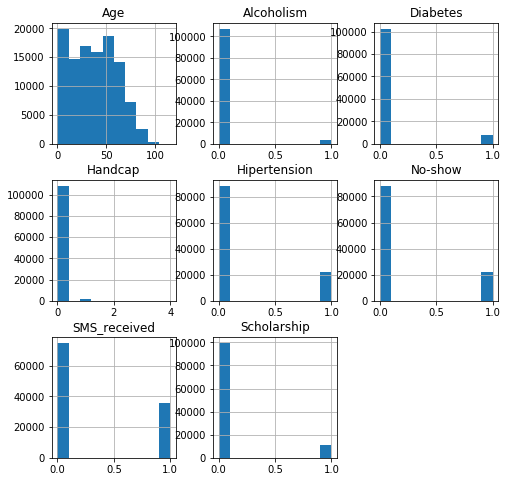

In [11]:
df.hist(figsize=(8,8));

##### showing all data in a histogram. 

##### we have finished from data cleaning, there was no any missing  data.

Calculate Patient Awaiting time
AwaitingTime is the rounded number of days from Scheduling to appointment

In [12]:
df['AwaitingTime'] = df["AppointmentDay"].sub(df["ScheduledDay"], axis=0)
df["AwaitingTime"] = (df["AwaitingTime"] / np.timedelta64(1, 'D')).abs()# abs for negative values

Create new feature of "WeekDay" which indicates the day at which the appointment was booked

In [13]:
df['WeekDay'] = pd.to_datetime(df['AppointmentDay']).apply(lambda x: x.isoweekday())

In [14]:
df['No-show'] = df['No-show'].replace(['Yes'],'0')
df['No-show'] = df['No-show'].replace(['No'],'1')

In [15]:
showed = df['No-show'] == 0
not_showed = df['No-show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed

In [16]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime,WeekDay,showed,not_showed
0,F,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,0,0,0.776481,5,True,False
1,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,0,0.672535,5,True,False
2,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0,0,0.679907,5,True,False
3,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0,0,0.728831,5,True,False
4,F,2016-04-29 16:07:23,2016-04-29,56,0,1,1,0,0,0,0,0.671794,5,True,False


# Exeploratory Section:

# Question 1

### 1- How much are the show and no show patiens?

In [17]:
df['No-show'].value_counts()

0    88207
1    22319
Name: No-show, dtype: int64

In [18]:
df['No-show'].value_counts(normalize=True)

0    0.798066
1    0.201934
Name: No-show, dtype: float64

##### the percentage of no show patient is about to 20%, and patient show are about to 80%



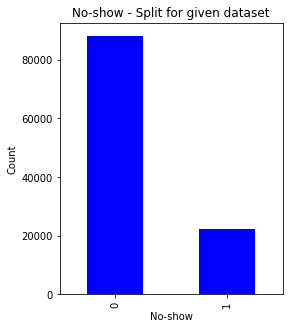

In [19]:
df['No-show'].value_counts().plot.bar(figsize = (4,5), title = 'No-show - Split for given dataset', color = 'b')
plt.xlabel('No-show')
plt.ylabel('Count');

##### this daigram shows the number of show & No show patients

# Question 2

### 2-What is the patient Age distribution of no-shows versus shows?

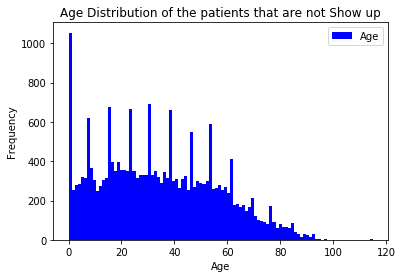

In [37]:
not_showedd = df[df['No-show']  == 1]
not_showedd.plot(kind = "hist",y = "Age",bins = 100, color = 'b') 
plt.title('Age Distribution of the patients that are not Show up')
plt.xlabel('Age');

Majority patients with age group from 0 to 60 did not show up for the appointment.

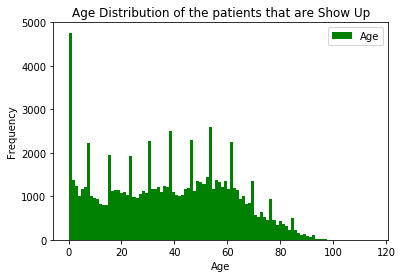

In [38]:
showedd = df[df['No-show'] == 0]
showedd.plot(kind = "hist",y = "Age",bins = 100, color = 'g') 
plt.title('Age Distribution of the patients that are Show Up')
plt.xlabel('Age')
plt.show()

Majority patients with age group from 0 to 60  showed up for the appointment.

# Question 4

### 4- what is the higest Handcap that the pations have?

In [33]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [34]:
df['Handcap'].value_counts(normalize=True)

0    0.979724
1    0.018475
2    0.001656
3    0.000118
4    0.000027
Name: Handcap, dtype: float64

##### the most handcap that patiens are facing is 0 which with about to 98%

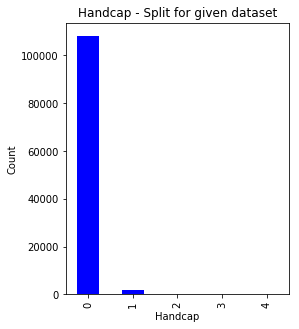

In [35]:
df['Handcap'].value_counts().plot.bar(figsize = (4,5), title = 'Handcap - Split for given dataset', color = 'b')
plt.xlabel('Handcap')
plt.ylabel('Count');

# Question 5

### 5- dose the SMS message help the patients to remind that they have an apointments? 

In [58]:
df['SMS_received'].value_counts(normalize=True)

0    0.678974
1    0.321026
Name: SMS_received, dtype: float64

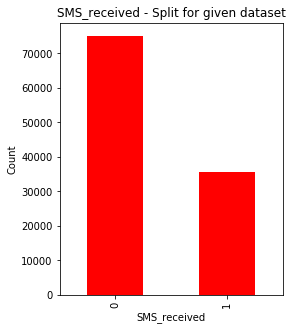

In [60]:
df['SMS_received'].value_counts().plot.bar(figsize = (4,5), title = 'SMS_received - Split for given dataset', color = 'r')
plt.xlabel('SMS_received')
plt.ylabel('Count');

In [15]:
df.groupby('SMS_received')['No-show'].mean()

SMS_received
0    0.167036
1    0.275777
Name: No-show, dtype: float64

##### SMS reminder didn't increase the patients show.

# Limitations

In analizing a dataset, number of each sample we are trying to analyze should be same or almost same. we are facing some
defference in between some samples. 

# In Conclusion

• The percentage of no show patient is about to 20%, and patient show are about to 80%.
about 65% of patient are Female, and 35% are Male.

• The minimum age of patient is -1, but we replaced it with the mean value and the highets is 115. the mean is 37.

• Majority patients with age group from 0 to 60 did not show up for the appointment.

• Majority patients with age group from 0 to 60 showed up for the appointment.

• The most handcap that patiens are facing is 0 which with about to 98%

• We found that sending an SMS for the appiontment is not the right way to make sure that the patient will come.

